# DailyDialog, Emotion-Stimulus, and ISEAR

## Import packages

In [ ]:
import pandas as pd

## Download data

In [ ]:
emotion_list = ['neutral',
                'anger',
                'disgust',
                'fear',
                'joy',
                'sadness',
                'surprise',
                'shame',
                'guilt']

# DailyDialog
daily_dialog = pd.read_csv('./raw-data/dailydialog.csv', encoding='utf-8')
daily_dialog['Emotion'].replace({0:'neutral', 1:'anger', 2:'disgust', 3:'fear', 4:'joy', 5:'sadness', 6:'surprise'}, inplace=True)
print(daily_dialog.Emotion.value_counts())

# Emotion-Stimulus
emotion_stimulus = pd.read_csv('./raw-data/emotion-stimulus.csv', encoding='utf-8')
emotion_stimulus['Emotion'].replace({'happy':'joy', 'sad':'sadness'}, inplace=True)
print(emotion_stimulus.Emotion.value_counts())

# ISEAR
isear = pd.read_csv('./raw-data/isear.csv', encoding='utf-8')
print(isear.Emotion.value_counts())

df = daily_dialog.append(emotion_stimulus).append(isear)

print(df.Emotion.value_counts())

neutral     85572
joy         12885
surprise     1823
sadness      1150
anger        1022
disgust       353
fear          174
Name: Emotion, dtype: int64
sadness     575
anger       483
joy         479
fear        423
surprise    213
shame       146
disgust      95
Name: Emotion, dtype: int64
joy        1081
fear       1081
anger      1071
disgust    1067
sadness    1067
shame      1054
guilt      1052
Name: Emotion, dtype: int64
neutral     85572
joy         14445
sadness      2792
anger        2576
surprise     2036
fear         1678
disgust      1515
shame        1200
guilt        1052
Name: Emotion, dtype: int64


## Balance data

In [ ]:
emotions_to_remove = ['neutral', 'joy', 'shame', 'guilt']
df_filtered = df[~df['Emotion'].isin(emotions_to_remove)]
print(df_filtered.Emotion.value_counts())

NUM_AVG_SAMPLES = round(sum(df_filtered.Emotion.value_counts()) / len(df_filtered.Emotion.value_counts()))

def get_sampled_df(df, emotions_to_sample, num_samples, rand):
    new_df = pd.DataFrame()
    for emotion in emotions_to_sample:
        new_df = new_df.append(df[df['Emotion'] == emotion].sample(n=num_samples, random_state=rand))

    return new_df

emotions_to_sample = ['neutral', 'joy']
df_sampled = get_sampled_df(df, emotions_to_sample, NUM_AVG_SAMPLES, 1)

df_balanced = df_filtered.append(df_sampled)
print(df_balanced.Emotion.value_counts())

sadness     2792
anger       2576
surprise    2036
fear        1678
disgust     1515
Name: Emotion, dtype: int64
sadness     2792
anger       2576
joy         2119
neutral     2119
surprise    2036
fear        1678
disgust     1515
Name: Emotion, dtype: int64


## Export DF

In [ ]:
df1 = df_balanced

sadness     2792
anger       2576
joy         2119
neutral     2119
surprise    2036
fear        1678
disgust     1515
Name: Emotion, dtype: int64


# GoEmotions

## Import packages

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Download data

In [ ]:
!pip install wget
import wget

emo2idx = {
    'admiration': 0,
    'amusement': 1,
    'anger': 2,
    'annoyance': 3,
    'approval': 4,
    'caring': 5,
    'confusion': 6,
    'curiosity': 7,
    'desire': 8,
    'disappointment': 9,
    'disapproval': 10,
    'disgust': 11,
    'embarrassment': 12,
    'excitement': 13,
    'fear': 14,
    'gratitude': 15,
    'grief': 16,
    'joy': 17,
    'love': 18,
    'nervousness': 19,
    'optimism': 20,
    'pride': 21,
    'realization': 22,
    'relief': 23,
    'remorse': 24,
    'sadness': 25,
    'surprise': 26,
    'neutral': 27
}
# text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral

if not os.path.exists('./goemotions/'):
    !wget -P goemotions/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
    !wget -P goemotions/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
    !wget -P goemotions/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

goemotions_1 = pd.read_csv('./goemotions/goemotions_1.csv', encoding='utf-8')
goemotions_2 = pd.read_csv('./goemotions/goemotions_2.csv', encoding='utf-8')
goemotions_3 = pd.read_csv('./goemotions/goemotions_3.csv', encoding='utf-8')

goemotions_raw = goemotions_1.append(goemotions_2).append(goemotions_3)
print(goemotions_raw.shape)
display(goemotions_raw.head())

goemotions_raw = goemotions_raw[goemotions_raw['example_very_unclear'] == False]
print(goemotions_raw.shape)
display(goemotions_raw.head())
            

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=0254bcd8a601931422d9d1d0da5f159e1ac2629653cc43bcbf02973a756a473b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2021-12-16 06:36:28--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘goemotions/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  --.-KB/s    in 0.1s    

2021-12-16 06:36:28 (106 MB/s) - ‘goemotions/goemotions_1.csv’ saved [14174600/14174600]

--2021-12-16 06:36:29--  https://storage.googleapis.com/gresearch/goemotions/data/full_data

text  ... neutral
0                                    That game hurt.  ...       0
1   >sexuality shouldn’t be a grouping category I...  ...       0
2     You do right, if you don't care then fuck 'em!  ...       1
3                                 Man I love reddit.  ...       0
4  [NAME] was nowhere near them, he was by the Fa...  ...       1

[5 rows x 37 columns]

(207814, 37)


text  ... neutral
0                                    That game hurt.  ...       0
2     You do right, if you don't care then fuck 'em!  ...       1
3                                 Man I love reddit.  ...       0
4  [NAME] was nowhere near them, he was by the Fa...  ...       1
5  Right? Considering it’s such an important docu...  ...       0

[5 rows x 37 columns]

In [ ]:
emo_list = ['admiration',
            'amusement',
            'anger',
            'annoyance',
            'approval',
            'caring',
            'confusion',
            'curiosity',
            'desire',
            'disappointment',
            'disapproval',
            'disgust',
            'embarrassment',
            'excitement',
            'fear',
            'gratitude',
            'grief',
            'joy',
            'love',
            'nervousness',
            'optimism',
            'pride',
            'realization',
            'relief',
            'remorse',
            'sadness',
            'surprise',
            'neutral']

sum_class = np.zeros(len(emo_list))
for idx, row in goemotions_raw.iterrows():
    emo_class = row[9:].values
    sum_class = np.add(sum_class, emo_class)

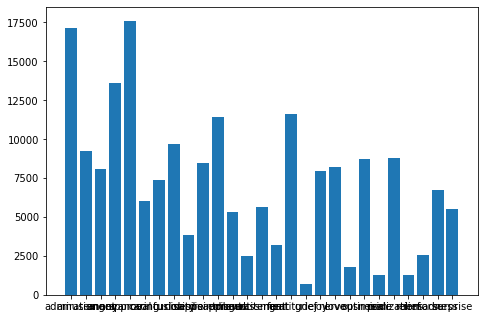

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(emo_list[:27], sum_class[:27])
fig.show()

In [ ]:
data_list = []

for _, row in goemotions_raw.iterrows():
    bin_arr = row[9:]
    emotions_idx = np.where(bin_arr == 1)
    emotions = ','.join([emo_list[idx] for idx in emotions_idx[0]])
    data_list.append([emotions, row['text']])

goemotions = pd.DataFrame(data_list, columns=['Emotion', 'Text'])
print(goemotions.shape)
display(goemotions.head(10))
df_balanced = goemotions[goemotions['Emotion'].isin(['neutral', 'anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])]
display(df_balanced.head(10))

(207814, 2)


Emotion                                               Text
0      sadness                                    That game hurt.
1      neutral     You do right, if you don't care then fuck 'em!
2         love                                 Man I love reddit.
3      neutral  [NAME] was nowhere near them, he was by the Fa...
4    gratitude  Right? Considering it’s such an important docu...
5  disapproval  He isn't as big, but he's still quite popular....
6    amusement  That's crazy; I went to a super [RELIGION] hig...
7    amusement                                that's adorable asf
8    amusement  "Sponge Blurb Pubs Quaw Haha GURR ha AAa!" fin...
9      neutral  I have, and now that you mention it, I think t...

Emotion                                               Text
0   sadness                                    That game hurt.
1   neutral     You do right, if you don't care then fuck 'em!
3   neutral  [NAME] was nowhere near them, he was by the Fa...
9   neutral  I have, and now that you mention it, I think t...
11  neutral                              BUT IT'S HER TURN! /s
13  neutral                                  Build a wall? /jk
15  neutral  One time my 1 stopped right in 91st, I was abl...
19  neutral  This video doesn't even show the shoes he was ...
23  neutral            this definitely fits in r/BoneAppleTea.
25  neutral                                 RemindMe! 3 months

In [ ]:
print(df_balanced.Emotion.value_counts())
display(df_balanced.head(10))

df_no_neutral = df_balanced[~df_balanced['Emotion'].isin(['neutral'])]
print(df_no_neutral.shape)
print(df_no_neutral.Emotion.value_counts())

NUM_SAMPLES = round(sum(df_no_neutral.Emotion.value_counts()) / len(df_no_neutral.Emotion.value_counts()))
df_neutral = df_balanced[df_balanced['Emotion'] == 'neutral'].sample(n=NUM_SAMPLES, random_state=1)

df = df_no_neutral.append(df_neutral)
print(df.Emotion.value_counts())

neutral     55298
anger        5202
joy          4329
sadness      3827
surprise     3472
disgust      2914
fear         1778
Name: Emotion, dtype: int64


Emotion                                               Text
0   sadness                                    That game hurt.
1   neutral     You do right, if you don't care then fuck 'em!
3   neutral  [NAME] was nowhere near them, he was by the Fa...
9   neutral  I have, and now that you mention it, I think t...
11  neutral                              BUT IT'S HER TURN! /s
13  neutral                                  Build a wall? /jk
15  neutral  One time my 1 stopped right in 91st, I was abl...
19  neutral  This video doesn't even show the shoes he was ...
23  neutral            this definitely fits in r/BoneAppleTea.
25  neutral                                 RemindMe! 3 months

(21522, 2)
anger       5202
joy         4329
sadness     3827
surprise    3472
disgust     2914
fear        1778
Name: Emotion, dtype: int64
anger       5202
joy         4329
sadness     3827
neutral     3587
surprise    3472
disgust     2914
fear        1778
Name: Emotion, dtype: int64


## Export DF

In [ ]:
df2 = df
print(df2.Emotion.value_counts())

anger       5202
joy         4329
sadness     3827
neutral     3587
surprise    3472
disgust     2914
fear        1778
Name: Emotion, dtype: int64


# CARER

In [ ]:
!pip install datasets
from datasets import load_dataset

emotion_dataset = load_dataset("emotion")

Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [ ]:
import pandas as pd
emotion_dataset.set_format(type="pandas")
train = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]

train.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

## Export DF

In [ ]:
df3 = train.append(test).append(val)
df3.rename(columns={"text": "Text", "label": "Emotion"}, inplace=True)
df3.head()
df3.replace({0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}, inplace=True)
df3.head()
df3.Emotion.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

# EmotionLines

In [ ]:
import json
import pandas as pd

In [ ]:
with open('./emotion-lines/Friends/friends_dev.json') as json_file:
    dev_json = json.load(json_file)

with open('./emotion-lines/Friends/friends_test.json') as json_file:
    test_json = json.load(json_file)

with open('./emotion-lines/Friends/friends_train.json') as json_file:
    train_json = json.load(json_file)

In [ ]:
def make_df_from_json(json):
    arr = []
    for scene in json:
        for utterance in scene:
            text = utterance['utterance'].replace('\u0092', "'")
            emotion = utterance['emotion']
            arr.append([text, emotion])

    return pd.DataFrame(arr, columns=['Text', 'Emotion'])

train = make_df_from_json(train_json)
test = make_df_from_json(test_json).append(make_df_from_json(dev_json))

In [ ]:
test.Emotion.value_counts()

neutral        1778
non-neutral     755
surprise        437
joy             427
anger           246
sadness         147
disgust          91
fear             61
Name: Emotion, dtype: int64

## Export DF

In [ ]:
temp = train.append(test)
print(temp.Emotion.value_counts())
emotions_to_remove = ['non-neutral']
df_filtered = temp[~temp['Emotion'].isin(emotions_to_remove)]
df4 = df_filtered
df4.Emotion.value_counts()

neutral        6530
non-neutral    2772
joy            1710
surprise       1657
anger           759
sadness         498
disgust         331
fear            246
Name: Emotion, dtype: int64


neutral     6530
joy         1710
surprise    1657
anger        759
sadness      498
disgust      331
fear         246
Name: Emotion, dtype: int64

# All combined

In [ ]:
combined_df = df1.append(df2).append(df3).append(df4)
combined_df.Emotion.value_counts()

joy         14919
sadness     12914
neutral     12236
anger       11246
surprise     7884
fear         6075
disgust      4760
love         1641
Name: Emotion, dtype: int64

In [ ]:
def get_sampled_df(df, emotions_to_sample, num_samples, rand):
    new_df = pd.DataFrame()
    for emotion in emotions_to_sample:
        new_df = new_df.append(df[df['Emotion'] == emotion].sample(n=num_samples, random_state=rand))

    return new_df

emotions_to_remove = ['joy', 'sadness', 'neutral', 'anger']
df_filtered = combined_df[~combined_df['Emotion'].isin(emotions_to_remove)]

emotions_to_sample = ['joy', 'sadness', 'neutral', 'anger']
df_sampled = get_sampled_df(combined_df, emotions_to_sample, 6000, 1)
full_df = df_filtered.append(df_sampled)
full_df.Emotion.value_counts()

surprise    7884
fear        6075
sadness     6000
joy         6000
anger       6000
neutral     6000
disgust     4760
love        1641
Name: Emotion, dtype: int64

In [ ]:
full_df.to_csv('./combined-data/combined-data.csv')

In [ ]:
print(full_df.sample(n=10, random_state=10))
print(full_df.Text[100055])

         Emotion                                               Text
10766       love  i definitely know how it feels to think that w...
10913    sadness  i feel like a worthless ugly fat unattractive ...
81590        joy   Tbh as a [NAME] this sort of news make me happy.
100055   disgust      That guy talked bad about his haircut I guess
9574     neutral  Hi! Umm, I'm Monica Geller, I'm the chef at Al...
124060   disgust  hate to say it but nobody outside of saskatche...
1468     sadness  ` Harry , we 're going to make ourselves miser...
9168        fear  i almost feel intimidated by the attempt to de...
1402    surprise                                             What?!
12915   surprise                 Why , you look pretty all right . 
100055        That guy talked bad about his haircut I guess
100055     I ’ m glad to know that you think the apartme...
Name: Text, dtype: object
